In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [202]:
df = pd.read_csv('MatNavi_Props.csv',encoding='latin1')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [203]:
df.drop(['Alloy code'],axis=1,inplace=True)

In [204]:
df.columns

Index([' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al',
       ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)', ' 0.2% Proof Stress (MPa)',
       ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [205]:
df = df.rename(columns={"Nb + Ta":"Nb_Ta",
                        " Temperature (°C)":"Temperature",
                        " 0.2% Proof Stress (MPa)":"0.2per_Proof_Stress",
                        " Tensile Strength (MPa)":"Tensile_Strength",
                        " Elongation (%)":"Elongation",
                        " Reduction in Area (%)":"Reduction_in_Area"})

In [206]:
df.columns = df.columns.str.replace(' ', '')

In [207]:
df.columns

Index(['C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'Cu', 'V', 'Al', 'N',
       'Ceq', 'Nb_Ta', 'Temperature', '0.2per_Proof_Stress',
       'Tensile_Strength', 'Elongation', 'Reduction_in_Area'],
      dtype='object')

In [208]:
df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   C                    905 non-null    float64
 1   Si                   905 non-null    float64
 2   Mn                   905 non-null    float64
 3   P                    905 non-null    float64
 4   S                    905 non-null    float64
 5   Ni                   905 non-null    float64
 6   Cr                   905 non-null    float64
 7   Mo                   905 non-null    float64
 8   Cu                   905 non-null    float64
 9   V                    905 non-null    float64
 10  Al                   905 non-null    float64
 11  N                    905 non-null    float64
 12  Ceq                  905 non-null    float64
 13  Nb_Ta                905 non-null    float64
 14  Temperature          905 non-null    int64  
 15  0.2per_Proof_Stress  905 non-null    int

In [210]:
df.shape

(905, 19)

In [211]:
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,0.175669,0.310619,0.816365,0.014614,0.010662,0.143891,0.422081,0.441277,0.079381,0.060855,0.012525,0.007653,0.095028,0.000041,350.403315,329.072928,497.213260,26.742541,70.082873
std,0.059569,0.087211,0.343120,0.005227,0.003996,0.173474,0.456740,0.396257,0.058730,0.096725,0.013110,0.002331,0.173199,0.000262,189.939463,132.056953,240.723067,8.770741,12.380079
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,219.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.700000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,291.000000,480.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,434.000000,576.000000,31.000000,79.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [212]:
df.nunique()

C                       24
Si                      32
Mn                      57
P                       22
S                       19
Ni                      44
Cr                      56
Mo                      51
Cu                      24
V                       20
Al                      31
N                       57
Ceq                     16
Nb_Ta                    2
Temperature             13
0.2per_Proof_Stress    381
Tensile_Strength       399
Elongation              50
Reduction_in_Area       61
dtype: int64

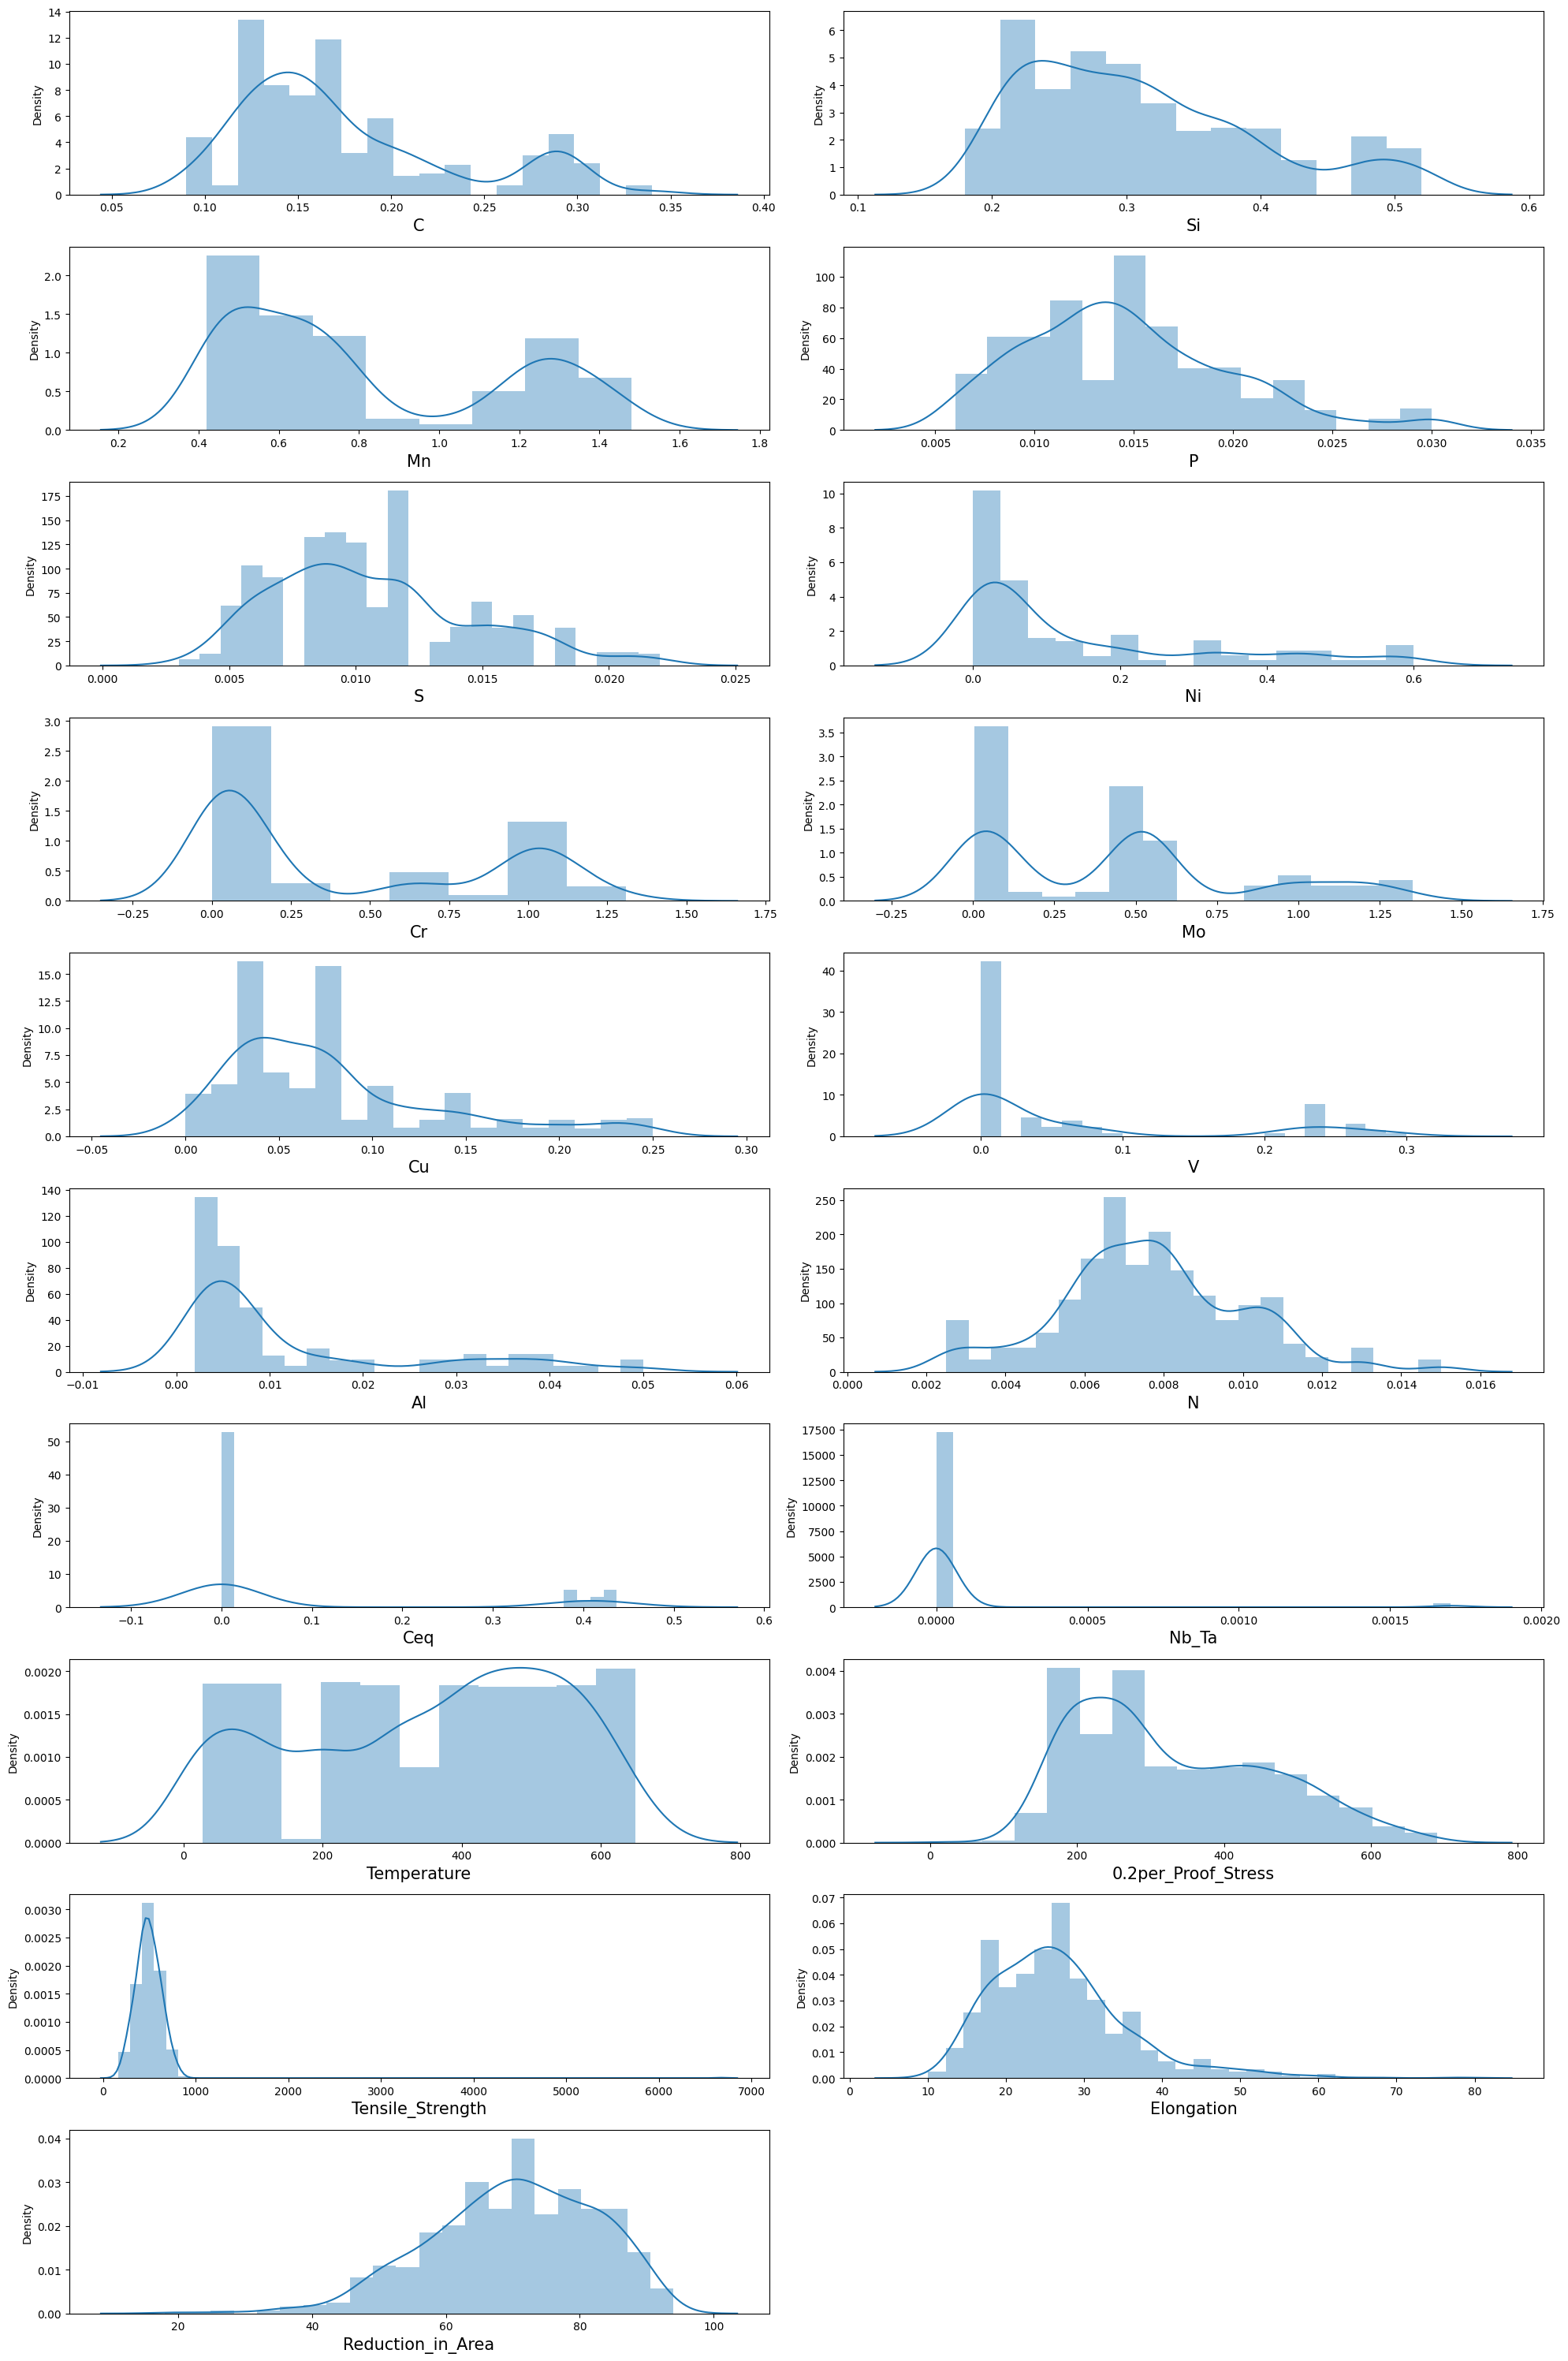

In [213]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 19:
        ax = plt.subplot(10, 2, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

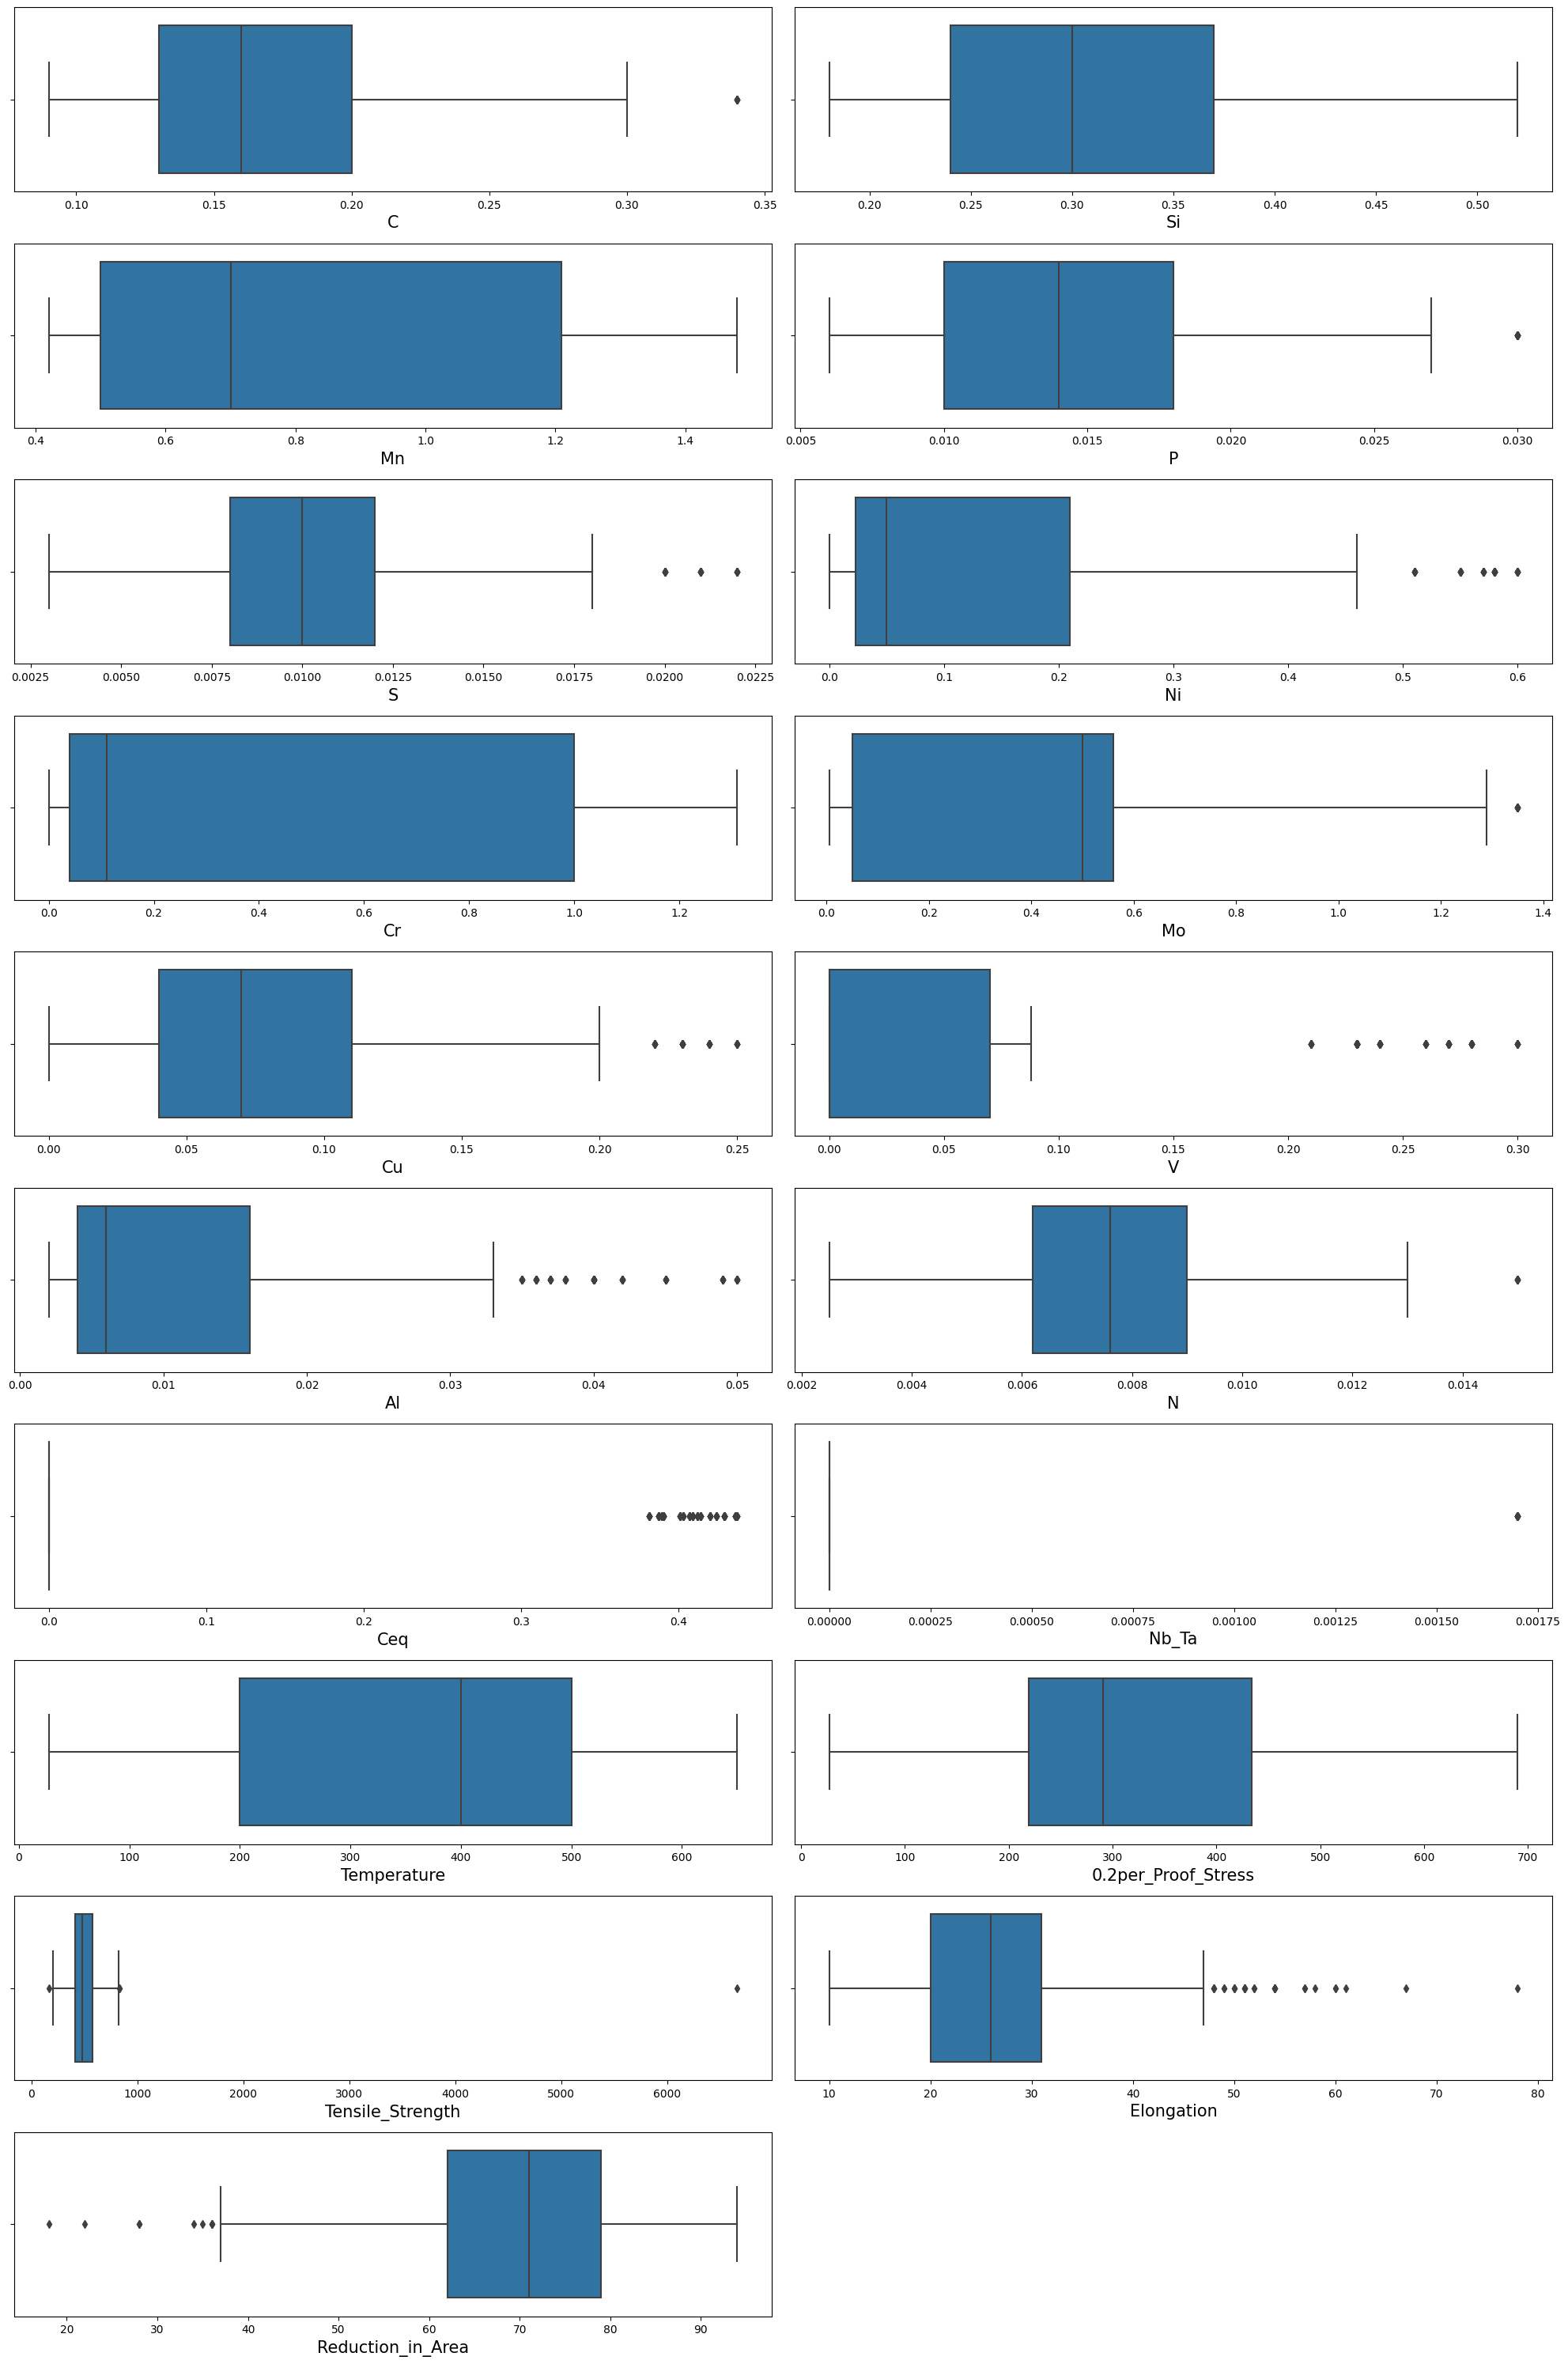

In [214]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 19:
        ax = plt.subplot(10, 2, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

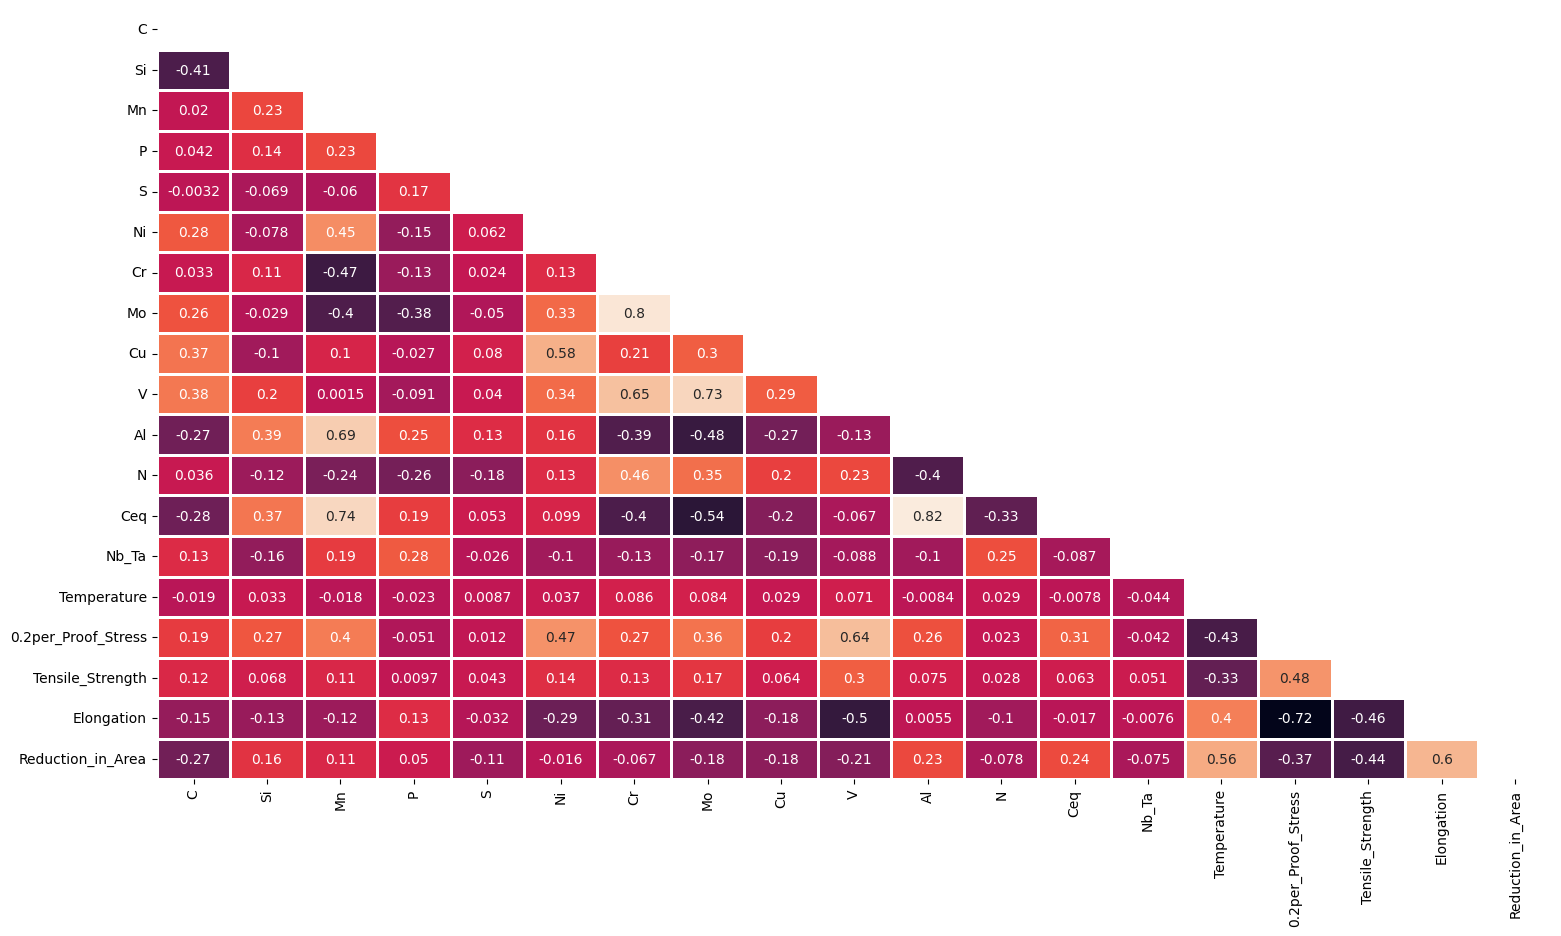

In [215]:
# checking for correlation using heatmap

plt.figure(figsize = (18, 10))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

# Prediction for Tensile strength:

<AxesSubplot:xlabel='Tensile_Strength', ylabel='Density'>

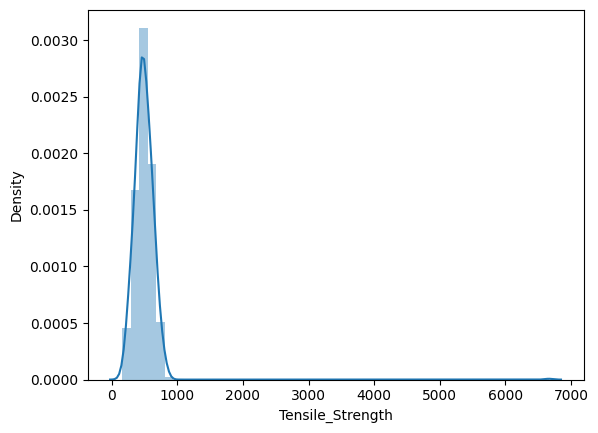

In [216]:
sns.distplot(df['Tensile_Strength'])

Data is not normally distributed and has outliers, lets see boxplot:

<AxesSubplot:xlabel='Tensile_Strength'>

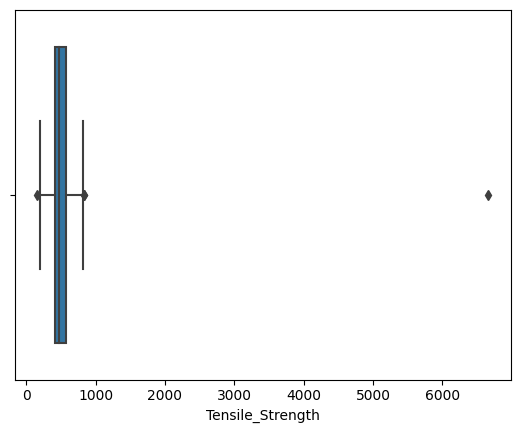

In [217]:
sns.boxplot(df['Tensile_Strength'])

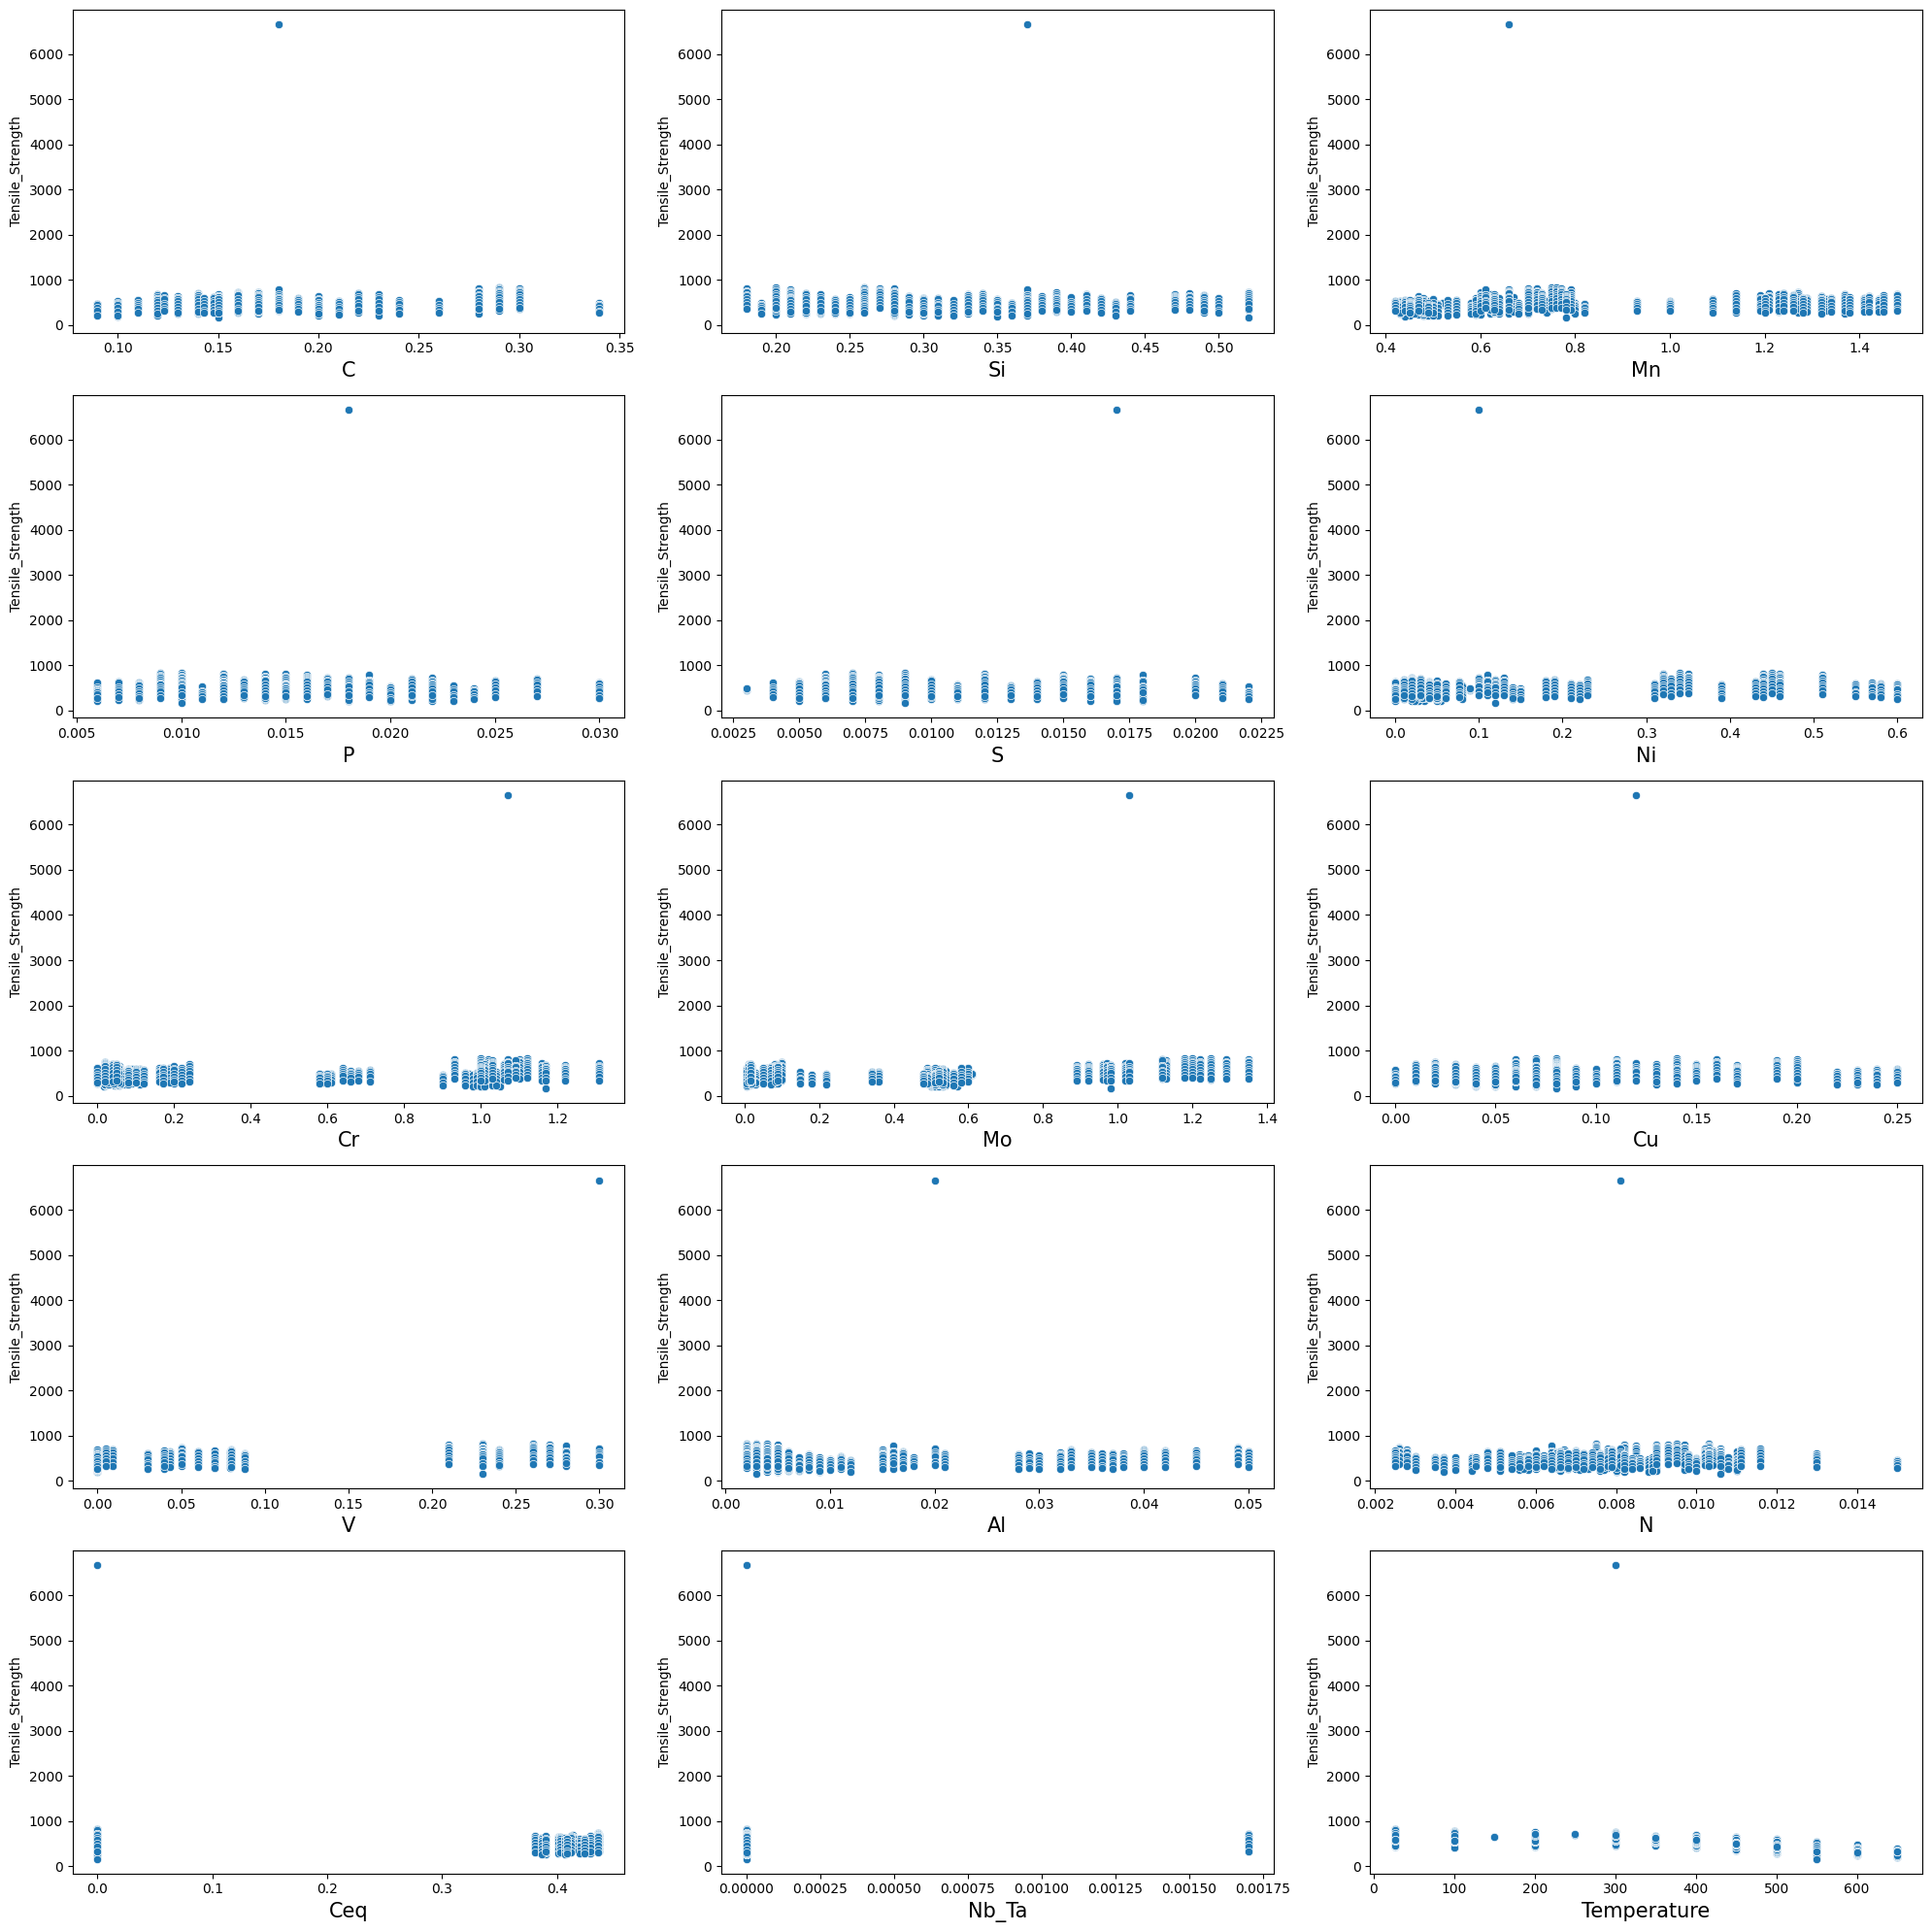

In [218]:
# let's check how our features are related to the target column

plt.figure(figsize = (20, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.scatterplot(df[col], df['Tensile_Strength'])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [219]:
df[df['Tensile_Strength']>1000]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area
616,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.12,0.3,0.02,0.0081,0.0,0.0,300,519,6661,11,28


Outliers removing using Z-Score:

Z score indicates how many standard deviation away a data point is

<h3 style='color:purple'>Calculate the Z Score</h3>

<img align='left' height="400" width="300" src="zscore.png" />

In [220]:
df['zscore'] = ( df.Tensile_Strength - df.Tensile_Strength.mean() ) / df.Tensile_Strength.std()
df.head(5)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,-0.029965
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,-0.179514
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,-0.133819
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,-0.009194
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,-0.034119


In [221]:
df[df['zscore']>3] #check for data with TS Z-score>3

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
616,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.12,0.3,0.02,0.0081,0.0,0.0,300,519,6661,11,28,25.605302


In [222]:
df[df['zscore']<-3] #check for data with TS Z-score<-3

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore


In [223]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,-0.029965
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,-0.179514
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,-0.133819
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,-0.009194
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,-0.034119


<AxesSubplot:xlabel='Tensile_Strength', ylabel='Density'>

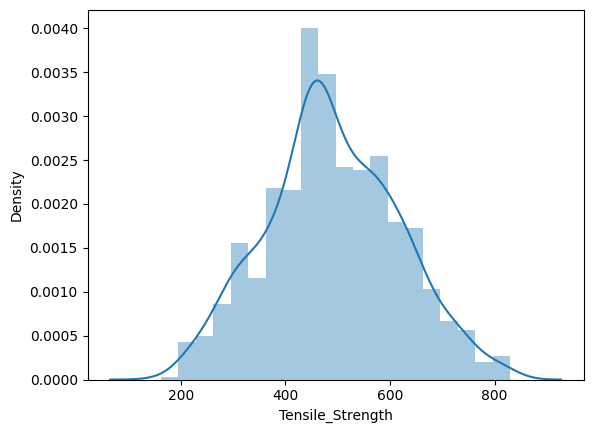

In [224]:
sns.distplot(df_no_outliers['Tensile_Strength'])

<AxesSubplot:xlabel='Tensile_Strength'>

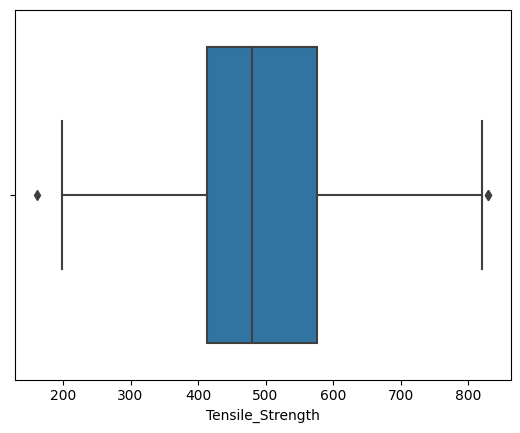

In [225]:
sns.boxplot(df_no_outliers['Tensile_Strength'])

In [226]:
X = df_no_outliers.iloc[:,:-5]
y = df_no_outliers['Tensile_Strength']

In [227]:
X.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400


In [228]:
y.head()

0    490
1    454
2    465
3    495
4    489
Name: Tensile_Strength, dtype: int64

In [229]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [230]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc_ts = StandardScaler()
X_train = sc_ts.fit_transform(X_train)
X_test = sc_ts.transform(X_test)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [232]:
LinearRegression =LinearRegression()
SGD =SGDRegressor()
Lasso =Lasso()
Ridge =Ridge()
RandomForest =RandomForestRegressor()
DecisionTree =DecisionTreeRegressor()
GradientBoosting =GradientBoostingRegressor()
Bagging =BaggingRegressor()
Adaboost=AdaBoostRegressor()
KNN =KNeighborsRegressor()
ExtraTree =ExtraTreesRegressor()
XGBoost=XGBRegressor()

In [233]:
algorithms =[LinearRegression,SGD,Lasso,Ridge,RandomForest,DecisionTree,GradientBoosting,Bagging,Adaboost,KNN,ExtraTree,XGBoost]

In [234]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])


In [235]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']
Results

,model,score_train,score_test
0,LinearRegression(),0.685201,0.716325
1,SGDRegressor(),0.684877,0.714383
2,Lasso(),0.683853,0.713325
3,Ridge(),0.685197,0.716222
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993966,0.972601
5,DecisionTreeRegressor(),1.0,0.941697
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.971897,0.968184
7,(DecisionTreeRegressor(random_state=1273994917...,0.990249,0.967522
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.851265,0.857084
9,KNeighborsRegressor(),0.825319,0.735642


In [236]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999885,0.977847
10,"(ExtraTreeRegressor(random_state=1818128887), ...",1.0,0.975425
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993966,0.972601
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.971897,0.968184
7,(DecisionTreeRegressor(random_state=1273994917...,0.990249,0.967522
5,DecisionTreeRegressor(),1.0,0.941697
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.851265,0.857084
9,KNeighborsRegressor(),0.825319,0.735642
0,LinearRegression(),0.685201,0.716325
3,Ridge(),0.685197,0.716222


In [237]:
# Lets check the diff between training & testing results to verify the overfitting.

Results['score_diff'] = abs(Results['score_train'] - Results['score_test'])
Results.sort_values(by=['score_diff'], ascending=True)

,model,score_train,score_test,score_diff
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.971897,0.968184,0.003713
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.851265,0.857084,0.005819
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993966,0.972601,0.021365
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999885,0.977847,0.022038
7,(DecisionTreeRegressor(random_state=1273994917...,0.990249,0.967522,0.022727
10,"(ExtraTreeRegressor(random_state=1818128887), ...",1.0,0.975425,0.024575
2,Lasso(),0.683853,0.713325,0.029471
1,SGDRegressor(),0.684877,0.714383,0.029507
3,Ridge(),0.685197,0.716222,0.031024
0,LinearRegression(),0.685201,0.716325,0.031124


In [238]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10,test_size=0.25, random_state=42)
corss_val = cross_val_score(DecisionTree, X, y, cv=cv)
DecisionTree_accuracy = np.mean(abs(corss_val))
print ("Decision Tree accuracy after cross validation {}:".format (DecisionTree_accuracy))

Decision Tree accuracy after cross validation 0.9093704556524447:


In [239]:
### Create a Pickle file using serialization, Decision Tree model is used
import pickle
pickle_out = open("DecisionTree_TS.pkl","wb")
pickle.dump(DecisionTree, pickle_out)
pickle_out.close()

In [264]:
### Create a Pickle file using serialization for Standard Scaler object
import pickle
pickle_out = open("sc_ts.pkl","wb")
pickle.dump(sc_ts, pickle_out)
pickle_out.close()

# Prediction for % Elongation:

<AxesSubplot:xlabel='Elongation', ylabel='Density'>

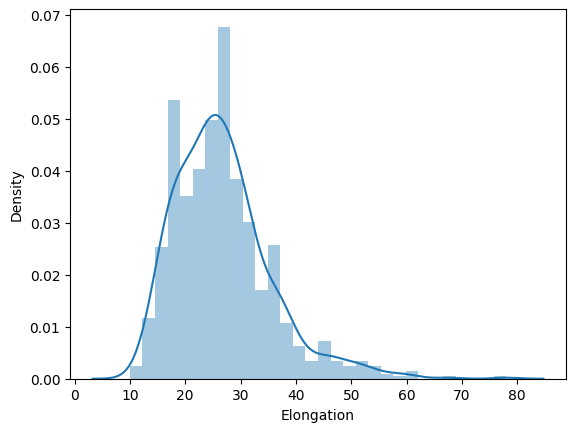

In [240]:
sns.distplot(df['Elongation'])

<AxesSubplot:xlabel='Elongation'>

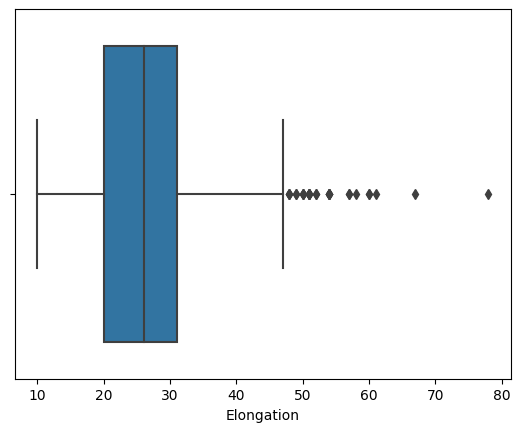

In [241]:
sns.boxplot(df['Elongation'])

In [242]:
df['zscore'] = ( df.Elongation - df.Elongation.mean() ) / df.Elongation.std()
df.head(5)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.371401
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.029354
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,-0.426708
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,-0.654738
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,-0.084661


In [243]:
df[df['zscore']>3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
12,0.090,0.37,0.49,0.006,0.005,0.055,0.980,0.570,0.07,0.00,0.005,0.0080,0.000,0.0,650,132,205,67,92,4.589972
19,0.100,0.28,0.49,0.008,0.009,0.028,0.900,0.560,0.08,0.00,0.006,0.0090,0.000,0.0,650,143,221,60,91,3.791864
39,0.120,0.28,0.44,0.018,0.008,0.030,0.990,0.540,0.08,0.00,0.007,0.0100,0.000,0.0,650,146,226,57,92,3.449818
59,0.120,0.36,0.45,0.018,0.007,0.028,1.000,0.530,0.05,0.00,0.007,0.0080,0.000,0.0,650,124,214,54,93,3.107771
69,0.100,0.35,0.44,0.020,0.007,0.050,1.010,0.510,0.08,0.00,0.012,0.0082,0.000,0.0,650,114,199,54,94,3.107771
79,0.090,0.32,0.48,0.020,0.017,0.023,1.050,0.520,0.04,0.00,0.009,0.0089,0.000,0.0,650,137,213,78,90,5.844142
108,0.200,0.31,0.59,0.018,0.009,0.000,0.046,0.011,0.05,0.00,0.006,0.0056,0.000,0.0,550,131,234,61,90,3.905880
126,0.200,0.29,0.55,0.021,0.009,0.000,0.054,0.012,0.05,0.00,0.004,0.0058,0.000,0.0,550,135,237,60,89,3.791864
171,0.200,0.31,0.50,0.022,0.017,0.000,0.017,0.006,0.09,0.00,0.004,0.0037,0.000,0.0,550,137,209,57,90,3.449818
180,0.230,0.32,0.53,0.023,0.016,0.000,0.022,0.005,0.07,0.00,0.005,0.0051,0.000,0.0,550,125,219,58,87,3.563833


In [244]:
df[df['zscore']<-3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore


In [245]:
df2= df[(df.zscore>-3) & (df.zscore<3)]

<AxesSubplot:xlabel='Elongation', ylabel='Density'>

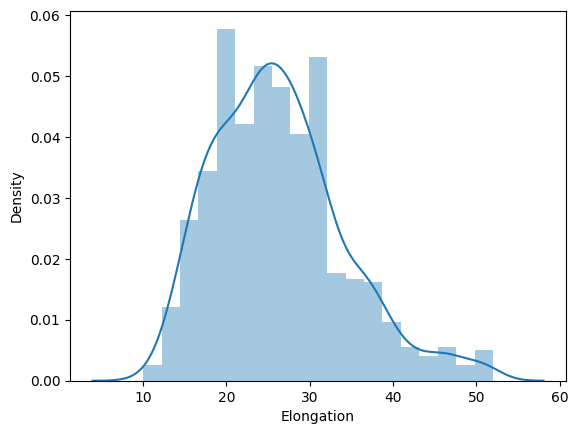

In [246]:
sns.distplot(df2['Elongation'])

<AxesSubplot:xlabel='Elongation'>

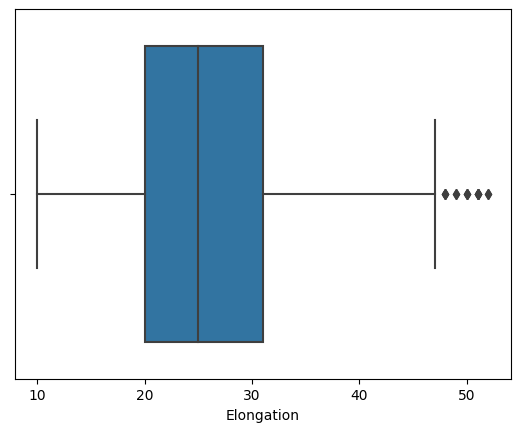

In [247]:
sns.boxplot(df2['Elongation'])

In [248]:
df2.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.371401
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.029354
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,-0.426708
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,-0.654738
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,-0.084661


In [249]:
X = df2.iloc[:,:-5]
y = df2['Elongation']

In [250]:
X.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400


In [251]:
y.head()

0    30
1    27
2    23
3    21
4    26
Name: Elongation, dtype: int64

In [252]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [253]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc_el = StandardScaler()
X_train = sc_el.fit_transform(X_train)
X_test = sc_el.transform(X_test)

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [255]:
LinearRegression = LinearRegression()
SGD =SGDRegressor()
Lasso =Lasso()
Ridge =Ridge()
RandomForest =RandomForestRegressor()
DecisionTree =DecisionTreeRegressor()
GradientBoosting =GradientBoostingRegressor()
Bagging =BaggingRegressor()
Adaboost=AdaBoostRegressor()
KNN =KNeighborsRegressor()
ExtraTree =ExtraTreesRegressor()
XGBoost=XGBRegressor()

In [256]:
algorithms =[LinearRegression,SGD,Lasso,Ridge,RandomForest,DecisionTree,GradientBoosting,Bagging,Adaboost,KNN,ExtraTree,XGBoost]

In [257]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])


In [258]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']
Results

,model,score_train,score_test
0,LinearRegression(),0.539502,0.504648
1,SGDRegressor(),0.538873,0.506652
2,Lasso(),0.447134,0.453471
3,Ridge(),0.539499,0.504888
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.98016,0.870704
5,DecisionTreeRegressor(),1.0,0.720282
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.933154,0.87211
7,(DecisionTreeRegressor(random_state=880686693)...,0.965879,0.843755
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.778561,0.718662
9,KNeighborsRegressor(),0.755917,0.580463


In [259]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.933154,0.87211
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.98016,0.870704
10,"(ExtraTreeRegressor(random_state=1793878491), ...",1.0,0.861773
7,(DecisionTreeRegressor(random_state=880686693)...,0.965879,0.843755
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999428,0.82567
5,DecisionTreeRegressor(),1.0,0.720282
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.778561,0.718662
9,KNeighborsRegressor(),0.755917,0.580463
1,SGDRegressor(),0.538873,0.506652
3,Ridge(),0.539499,0.504888


In [260]:
# Lets check the diff between training & testing results to verify the overfitting.

Results['score_diff'] = abs(Results['score_train'] - Results['score_test'])
Results.sort_values(by=['score_diff'], ascending=True)

,model,score_train,score_test,score_diff
2,Lasso(),0.447134,0.453471,0.006337
1,SGDRegressor(),0.538873,0.506652,0.032221
3,Ridge(),0.539499,0.504888,0.034611
0,LinearRegression(),0.539502,0.504648,0.034854
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.778561,0.718662,0.059899
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.933154,0.87211,0.061044
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.98016,0.870704,0.109456
7,(DecisionTreeRegressor(random_state=880686693)...,0.965879,0.843755,0.122124
10,"(ExtraTreeRegressor(random_state=1793878491), ...",1.0,0.861773,0.138227
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999428,0.82567,0.173758


In [261]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.25, random_state=42)
corss_val = cross_val_score(XGBoost, X, y, cv=cv)
XGBoost_accuracy = np.mean(abs(corss_val))
print ("XGBoost accuracy after cross validation {}:".format (XGBoost_accuracy))

XGBoost accuracy after cross validation 0.859316253137093:


In [262]:
### Create a Pickle file using serialization, XGBoost model is used
import pickle
pickle_out = open("XGBoost_el.pkl","wb")
pickle.dump(XGBoost, pickle_out)
pickle_out.close()

In [263]:
### Create a Pickle file using serialization for Standard Scaler object
import pickle
pickle_out = open("sc_el.pkl","wb")
pickle.dump(sc_el, pickle_out)
pickle_out.close()

# Prediction for Reduction in Area:

<AxesSubplot:xlabel='Reduction_in_Area', ylabel='Density'>

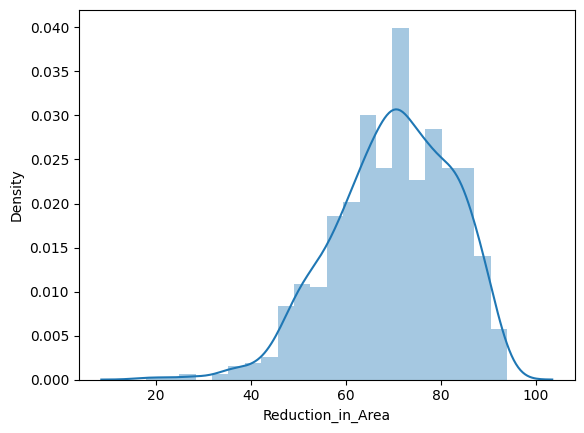

In [265]:
sns.distplot(df['Reduction_in_Area'])

<AxesSubplot:xlabel='Reduction_in_Area'>

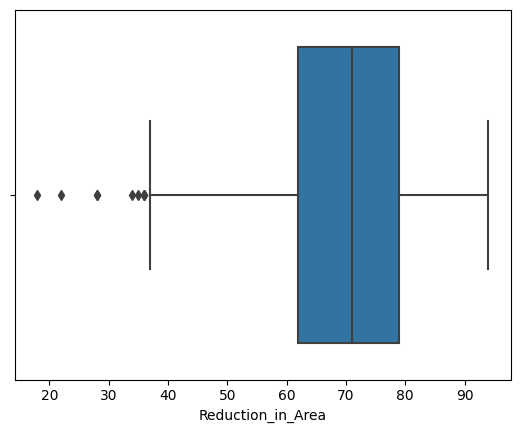

In [266]:
sns.boxplot(df['Reduction_in_Area'])

In [267]:
df['zscore'] = ( df.Reduction_in_Area - df.Reduction_in_Area.mean() ) / df.Reduction_in_Area.std()
df.head(5)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.074081
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.154856
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,-0.087469
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,-0.006694
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,0.720280


In [268]:
df[df['zscore']>3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore


In [269]:
df[df['zscore']<-3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
238,0.20,0.28,0.59,0.012,0.010,0.02,0.02,0.54,0.07,0.00,0.003,0.0054,0.0,0.0,300,278,557,24,28,-3.399241
587,0.17,0.39,0.60,0.022,0.020,0.11,1.31,1.02,0.11,0.28,0.004,0.0078,0.0,0.0,400,456,605,10,22,-3.883891
615,0.18,0.37,0.66,0.018,0.017,0.10,1.07,1.03,0.12,0.30,0.020,0.0081,0.0,0.0,200,572,714,14,18,-4.206990
616,0.18,0.37,0.66,0.018,0.017,0.10,1.07,1.03,0.12,0.30,0.020,0.0081,0.0,0.0,300,519,6661,11,28,-3.399241


In [270]:
df3= df[(df.zscore>-3) & (df.zscore<3)]

<AxesSubplot:xlabel='Reduction_in_Area', ylabel='Density'>

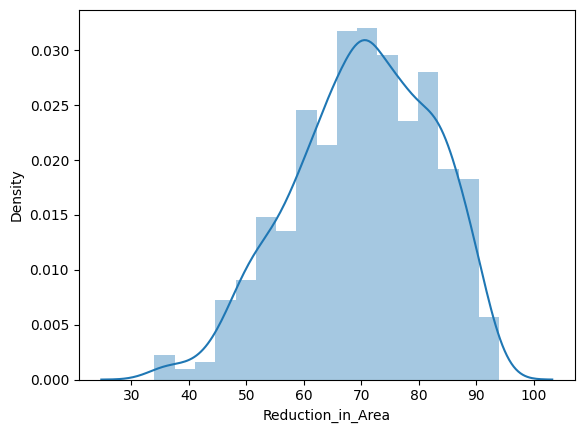

In [271]:
sns.distplot(df3['Reduction_in_Area'])

<AxesSubplot:xlabel='Reduction_in_Area'>

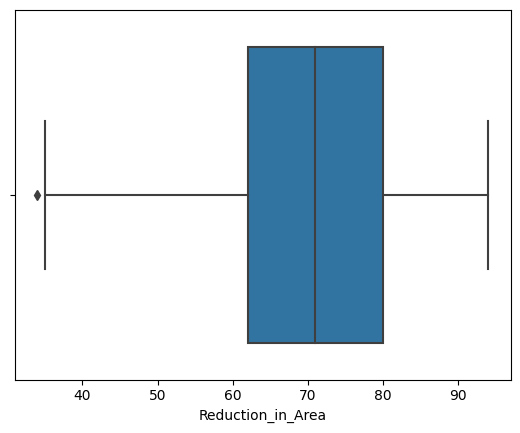

In [272]:
sns.boxplot(df3['Reduction_in_Area'])

In [274]:
X = df3.iloc[:,:-5]
y = df3['Reduction_in_Area']

In [275]:
X.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400


In [276]:
y.head()

0    71
1    72
2    69
3    70
4    79
Name: Reduction_in_Area, dtype: int64

In [277]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [278]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc_ra = StandardScaler()
X_train = sc_ra.fit_transform(X_train)
X_test = sc_ra.transform(X_test)

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

LinearRegression = LinearRegression()
SGD =SGDRegressor()
Lasso =Lasso()
Ridge =Ridge()
RandomForest =RandomForestRegressor()
DecisionTree =DecisionTreeRegressor()
GradientBoosting =GradientBoostingRegressor()
Bagging =BaggingRegressor()
Adaboost=AdaBoostRegressor()
KNN =KNeighborsRegressor()
ExtraTree =ExtraTreesRegressor()
XGBoost=XGBRegressor()

In [280]:
algorithms =[LinearRegression,SGD,Lasso,Ridge,RandomForest,DecisionTree,GradientBoosting,Bagging,Adaboost,KNN,ExtraTree,XGBoost]

model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])


In [281]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']
Results

,model,score_train,score_test
0,LinearRegression(),0.486883,0.544135
1,SGDRegressor(),0.486534,0.544226
2,Lasso(),0.417329,0.461208
3,Ridge(),0.486877,0.544083
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.981174,0.869378
5,DecisionTreeRegressor(),1.0,0.778412
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.926766,0.868227
7,(DecisionTreeRegressor(random_state=1771537183...,0.978354,0.856848
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.782308,0.744479
9,KNeighborsRegressor(),0.754897,0.716014


In [282]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999098,0.907837
10,"(ExtraTreeRegressor(random_state=1849377254), ...",1.0,0.891564
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.981174,0.869378
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.926766,0.868227
7,(DecisionTreeRegressor(random_state=1771537183...,0.978354,0.856848
5,DecisionTreeRegressor(),1.0,0.778412
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.782308,0.744479
9,KNeighborsRegressor(),0.754897,0.716014
1,SGDRegressor(),0.486534,0.544226
0,LinearRegression(),0.486883,0.544135


In [283]:
# Lets check the diff between training & testing results to verify the overfitting.

Results['score_diff'] = abs(Results['score_train'] - Results['score_test'])
Results.sort_values(by=['score_diff'], ascending=True)

,model,score_train,score_test,score_diff
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.782308,0.744479,0.037829
9,KNeighborsRegressor(),0.754897,0.716014,0.038883
2,Lasso(),0.417329,0.461208,0.043879
3,Ridge(),0.486877,0.544083,0.057205
0,LinearRegression(),0.486883,0.544135,0.057252
1,SGDRegressor(),0.486534,0.544226,0.057693
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.926766,0.868227,0.058538
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.999098,0.907837,0.09126
10,"(ExtraTreeRegressor(random_state=1849377254), ...",1.0,0.891564,0.108436
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.981174,0.869378,0.111795


In [284]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.25, random_state=42)
corss_val = cross_val_score(XGBoost, X, y, cv=cv)
XGBoost_accuracy = np.mean(abs(corss_val))
print ("XGBoost accuracy after cross validation {}:".format (XGBoost_accuracy))

XGBoost accuracy after cross validation 0.8946788457150712:


In [285]:
### Create a Pickle file using serialization, XGBoost model is used
import pickle
pickle_out = open("XGBoost_ra.pkl","wb")
pickle.dump(XGBoost, pickle_out)
pickle_out.close()

In [286]:
### Create a Pickle file using serialization for Standard Scaler object
import pickle
pickle_out = open("sc_ra.pkl","wb")
pickle.dump(sc_ra, pickle_out)
pickle_out.close()

# Prediction for 0.2% Proof Stress:

<AxesSubplot:xlabel='0.2per_Proof_Stress', ylabel='Density'>

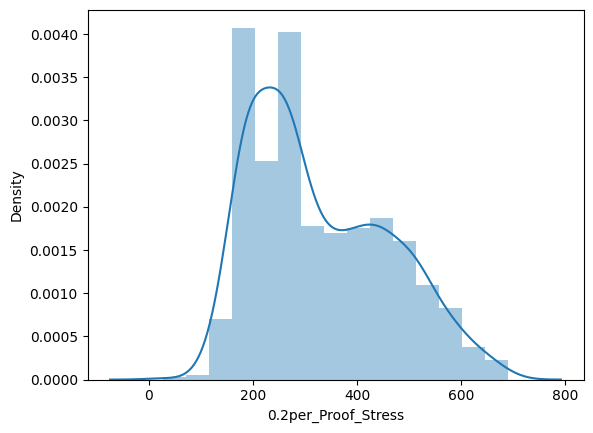

In [287]:
sns.distplot(df['0.2per_Proof_Stress'])

<AxesSubplot:xlabel='0.2per_Proof_Stress'>

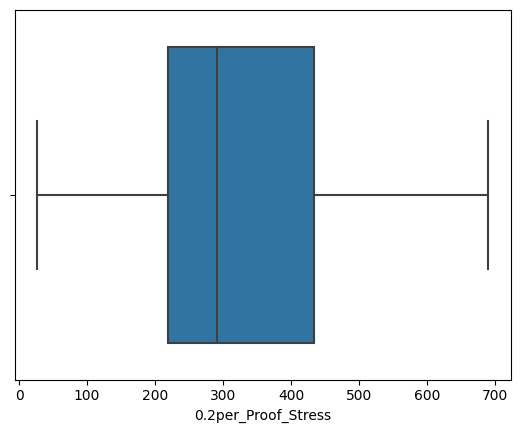

In [288]:
sns.boxplot(df['0.2per_Proof_Stress'])

In [289]:
df['zscore'] = ( df['0.2per_Proof_Stress'] - df['0.2per_Proof_Stress'].mean() ) / df['0.2per_Proof_Stress'].std()
df.head(5)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71,0.097890
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72,0.067600
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69,0.060028
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70,0.128180
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79,-0.098995


In [290]:
df[df['zscore']>3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore


In [291]:
df[df['zscore']<-3]

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature,0.2per_Proof_Stress,Tensile_Strength,Elongation,Reduction_in_Area,zscore


No outliers in 0.2per_Proof_Stress column

In [292]:
X = df3.iloc[:,:-5]
y = df3['0.2per_Proof_Stress']

In [293]:
X.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb_Ta,Temperature
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400


In [294]:
y.head()

0    342
1    338
2    337
3    346
4    316
Name: 0.2per_Proof_Stress, dtype: int64

In [295]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [296]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc_ps = StandardScaler()
X_train = sc_ps.fit_transform(X_train)
X_test = sc_ps.transform(X_test)

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

LinearRegression = LinearRegression()
SGD =SGDRegressor()
Lasso =Lasso()
Ridge =Ridge()
RandomForest =RandomForestRegressor()
DecisionTree =DecisionTreeRegressor()
GradientBoosting =GradientBoostingRegressor()
Bagging =BaggingRegressor()
Adaboost=AdaBoostRegressor()
KNN =KNeighborsRegressor()
ExtraTree =ExtraTreesRegressor()
XGBoost=XGBRegressor()

In [298]:
algorithms =[LinearRegression,SGD,Lasso,Ridge,RandomForest,DecisionTree,GradientBoosting,Bagging,Adaboost,KNN,ExtraTree,XGBoost]

model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algorithms)):
    algorithms[i].fit(X_train,y_train)
    accuracy_train.append(algorithms[i].score(X_train,y_train))
    accuracy_test.append(algorithms[i].score(X_test,y_test))
    model.append(algorithms[i])


In [299]:
Results =pd.DataFrame([model,accuracy_train,accuracy_test]).T
Results.columns=['model','score_train','score_test']
Results

,model,score_train,score_test
0,LinearRegression(),0.858944,0.796158
1,SGDRegressor(),0.858489,0.795795
2,Lasso(),0.857921,0.795395
3,Ridge(),0.858937,0.796295
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993727,0.932033
5,DecisionTreeRegressor(),1.0,0.928495
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.978898,0.941772
7,"(DecisionTreeRegressor(random_state=37363419),...",0.990233,0.942076
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.86094,0.793611
9,KNeighborsRegressor(),0.92021,0.80183


In [300]:
Results.sort_values(by=['score_test'], ascending=False)

,model,score_train,score_test
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.99984,0.945715
7,"(DecisionTreeRegressor(random_state=37363419),...",0.990233,0.942076
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.978898,0.941772
10,"(ExtraTreeRegressor(random_state=1990656923), ...",1.0,0.93914
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993727,0.932033
5,DecisionTreeRegressor(),1.0,0.928495
9,KNeighborsRegressor(),0.92021,0.80183
3,Ridge(),0.858937,0.796295
0,LinearRegression(),0.858944,0.796158
1,SGDRegressor(),0.858489,0.795795


In [301]:
# Lets check the diff between training & testing results to verify the overfitting.

Results['score_diff'] = abs(Results['score_train'] - Results['score_test'])
Results.sort_values(by=['score_diff'], ascending=True)

,model,score_train,score_test,score_diff
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.978898,0.941772,0.037126
7,"(DecisionTreeRegressor(random_state=37363419),...",0.990233,0.942076,0.048157
11,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.99984,0.945715,0.054125
10,"(ExtraTreeRegressor(random_state=1990656923), ...",1.0,0.93914,0.06086
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993727,0.932033,0.061693
2,Lasso(),0.857921,0.795395,0.062526
3,Ridge(),0.858937,0.796295,0.062642
1,SGDRegressor(),0.858489,0.795795,0.062695
0,LinearRegression(),0.858944,0.796158,0.062786
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.86094,0.793611,0.067329


In [302]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.25, random_state=42)
corss_val = cross_val_score(XGBoost, X, y, cv=cv)
XGBoost_accuracy = np.mean(abs(corss_val))
print ("XGBoost accuracy after cross validation {}:".format (XGBoost_accuracy))

XGBoost accuracy after cross validation 0.9542955280294969:


In [303]:
### Create a Pickle file using serialization, XGBoost model is used
import pickle
pickle_out = open("XGBoost_ps.pkl","wb")
pickle.dump(XGBoost, pickle_out)
pickle_out.close()

In [304]:
### Create a Pickle file using serialization for Standard Scaler object
import pickle
pickle_out = open("sc_ps.pkl","wb")
pickle.dump(sc_ps, pickle_out)
pickle_out.close()